Sunspot dataset

This dataset describes a monthly count of the number of observed sunspots for just over 230 years (1749-1983).

The units are a count and there are 2,820 observations. The source of the dataset is credited to Andrews & Herzberg (1985).

Load libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

C:\Users\Corrado Mio\AppData\Local\Temp\ipykernel_3956\451119761.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Load and read dataset

In [3]:
# load dataset
train = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

In [4]:
train

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


Check for null values

In [6]:
train.isnull().sum()

Month       0
Sunspots    0
dtype: int64

Visualise time series

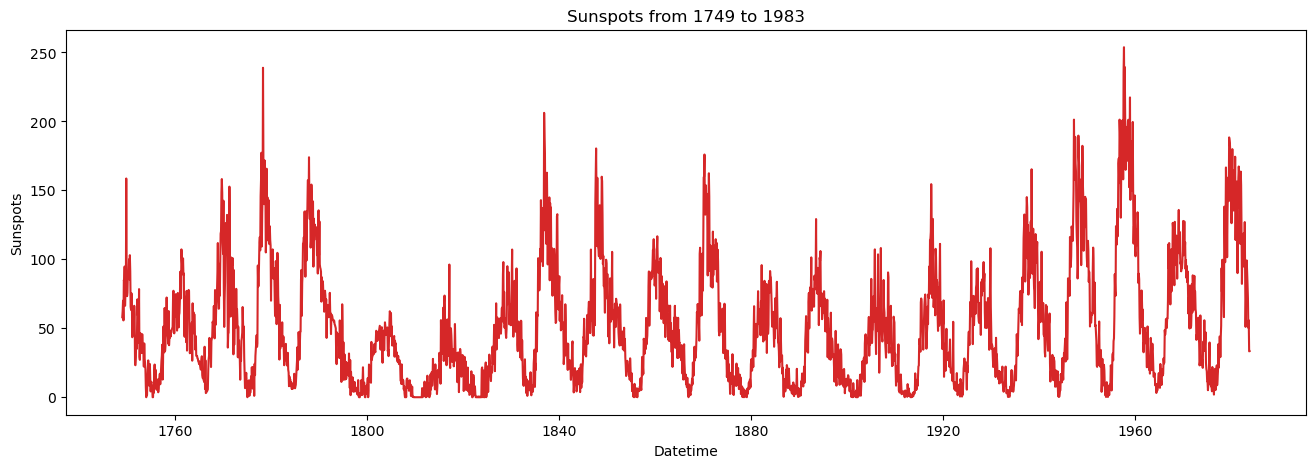

In [7]:
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', parse_dates=['Month'], index_col=['Month'])

def plot_df(train, x, y, title="Sunspots", xlabel='Datetime', ylabel='Sunspots', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train, x=df.index, y=train['Sunspots'], title='Sunspots from 1749 to 1983') 

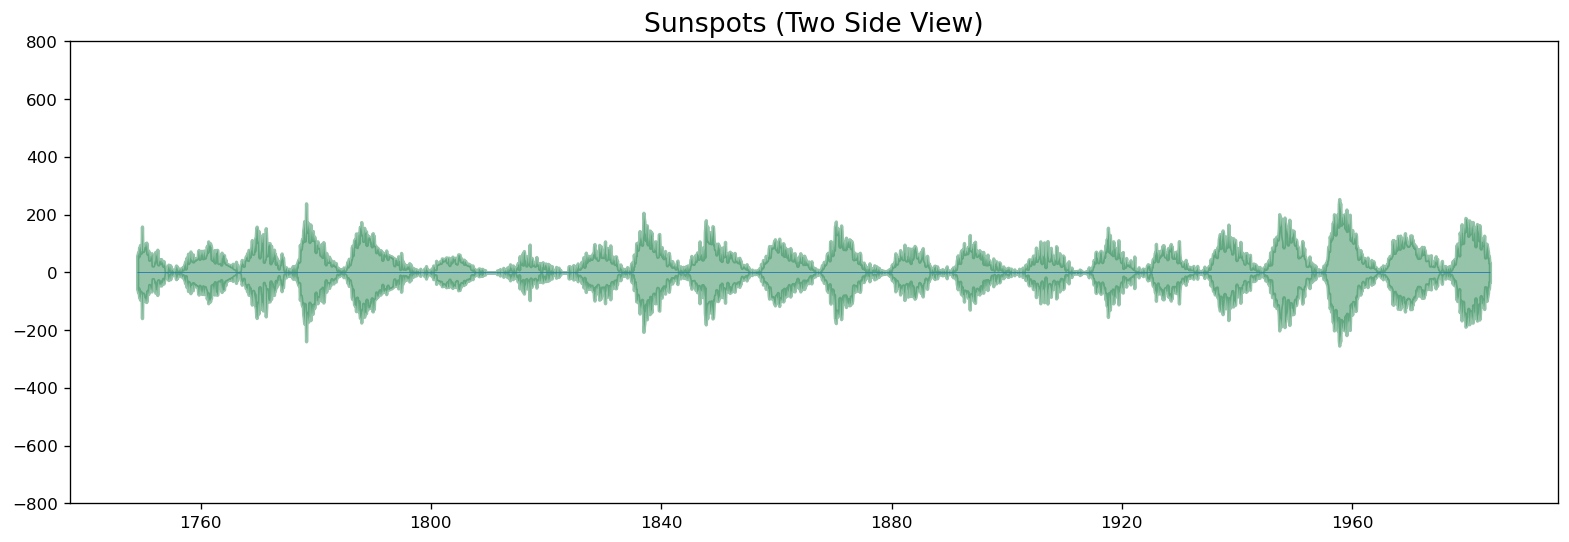

In [8]:
x = df.index.values
y1 = df['Sunspots'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sunspots (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

Graph data

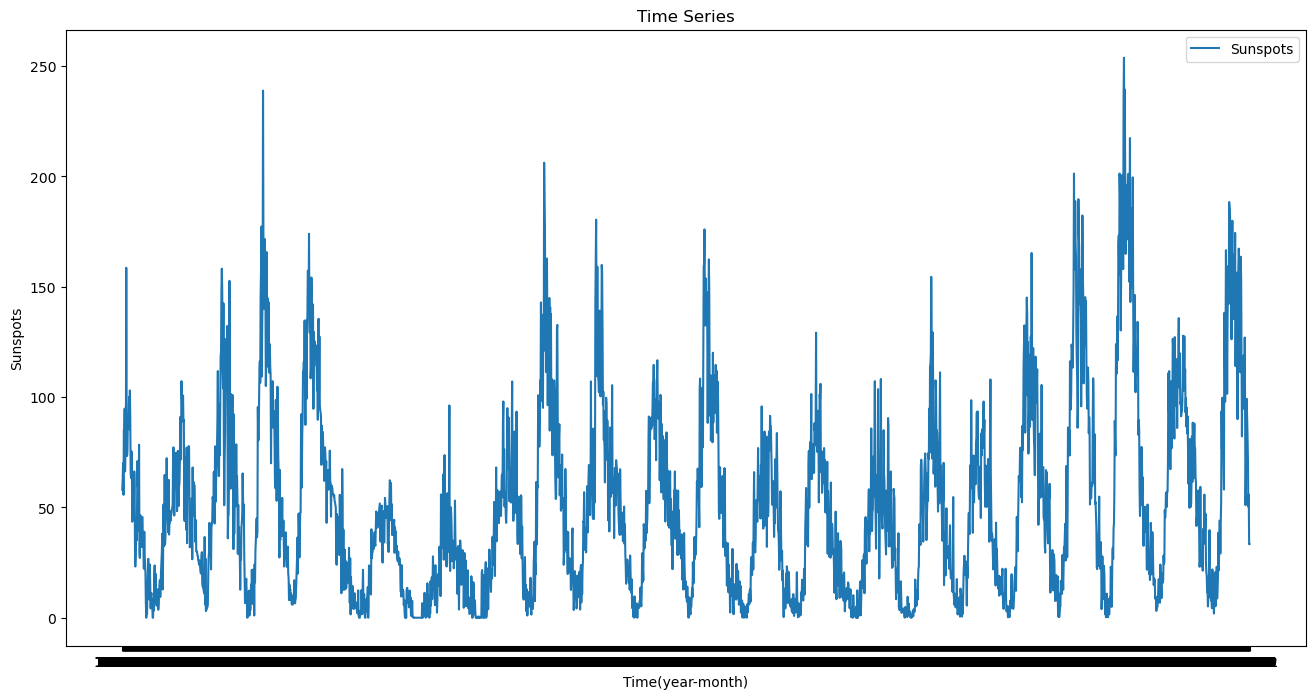

In [9]:
from pandas.plotting import register_matplotlib_converters

train.index = train['Month'] # indexing the Datetime to get the time period on the x-axis. 
ts = train['Sunspots'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Sunspots') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Sunspots") 
plt.legend(loc='best')

Text(0, 0.5, 'Sunspots')

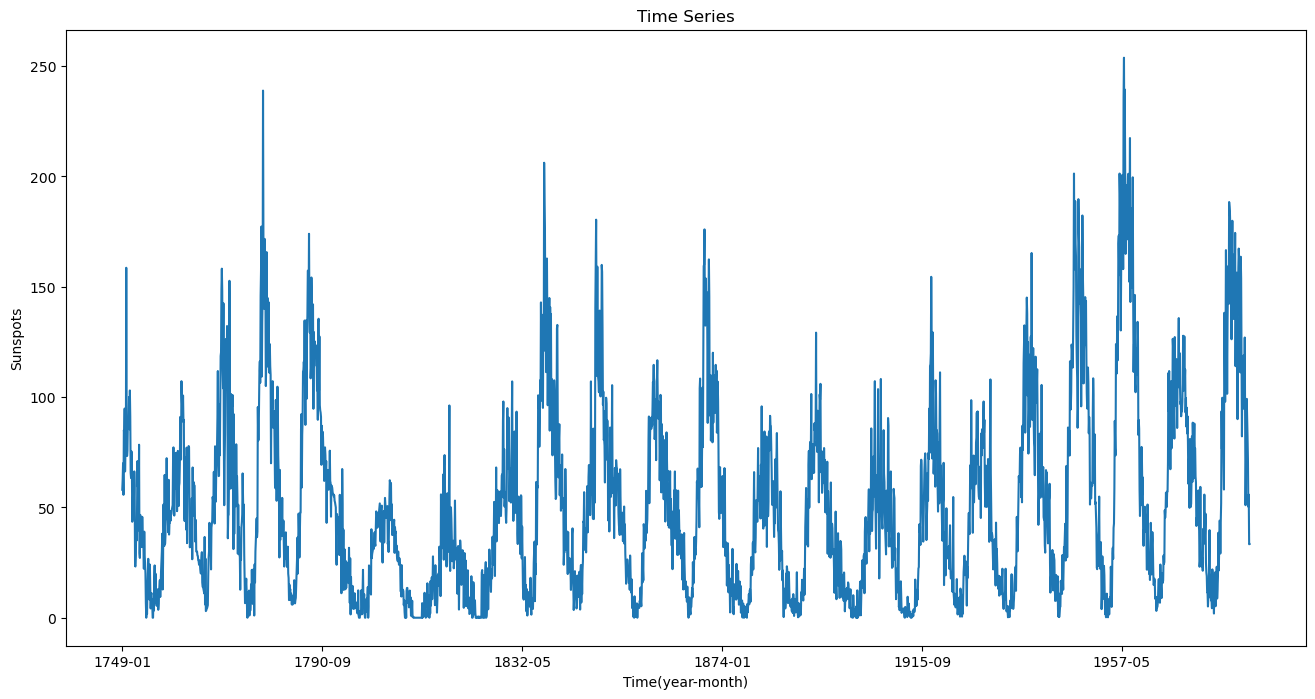

In [10]:
# different way of plotting Sunspots for training dataset. 
train['Sunspots'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Sunspots") 

In [11]:
year = train['Month'].astype(str)
train['Year'] = year.str[:4]
train

,Month,Sunspots,Year
Month,,,
1749-01,1749-01,58.0,1749
1749-02,1749-02,62.6,1749
1749-03,1749-03,70.0,1749
1749-04,1749-04,55.7,1749
1749-05,1749-05,85.0,1749
...,...,...,...
1983-08,1983-08,71.8,1983
1983-09,1983-09,50.3,1983
1983-10,1983-10,55.8,1983


<AxesSubplot:title={'center':'Yearly Sunspots'}, xlabel='Year'>

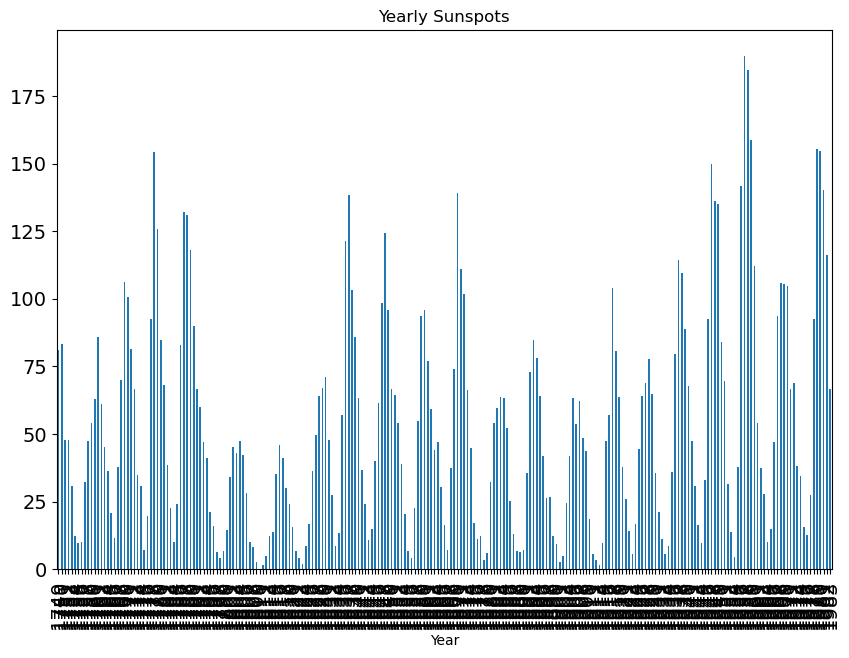

In [12]:
train.groupby('Year')['Sunspots'].mean().plot.bar(fontsize=14,figsize=(10,7),title='Yearly Sunspots')

In [13]:
month = train['Month'].astype(str)
train['Month_Num'] = month.str[5:]
train

,Month,Sunspots,Year,Month_Num
Month,,,,
1749-01,1749-01,58.0,1749,01
1749-02,1749-02,62.6,1749,02
1749-03,1749-03,70.0,1749,03
1749-04,1749-04,55.7,1749,04
1749-05,1749-05,85.0,1749,05
...,...,...,...,...
1983-08,1983-08,71.8,1983,08
1983-09,1983-09,50.3,1983,09
1983-10,1983-10,55.8,1983,10


<AxesSubplot:title={'center':'Monthly Sunspots'}, xlabel='Month_Num'>

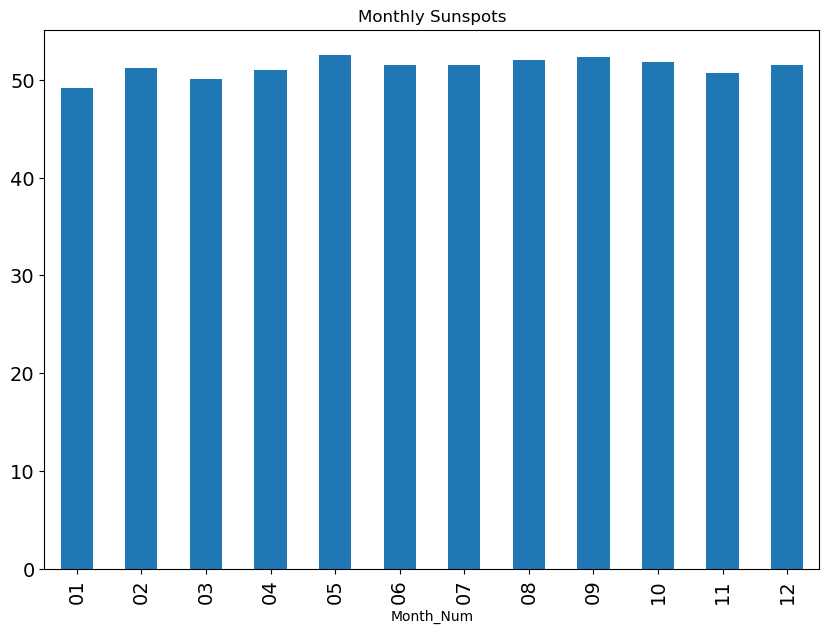

In [14]:
train.groupby('Month_Num')['Sunspots'].mean().plot.bar(fontsize=14,figsize=(10,7), title='Monthly Sunspots')

<AxesSubplot:title={'center':'Sunspots(Year& Month)'}, xlabel='Year,Month_Num'>

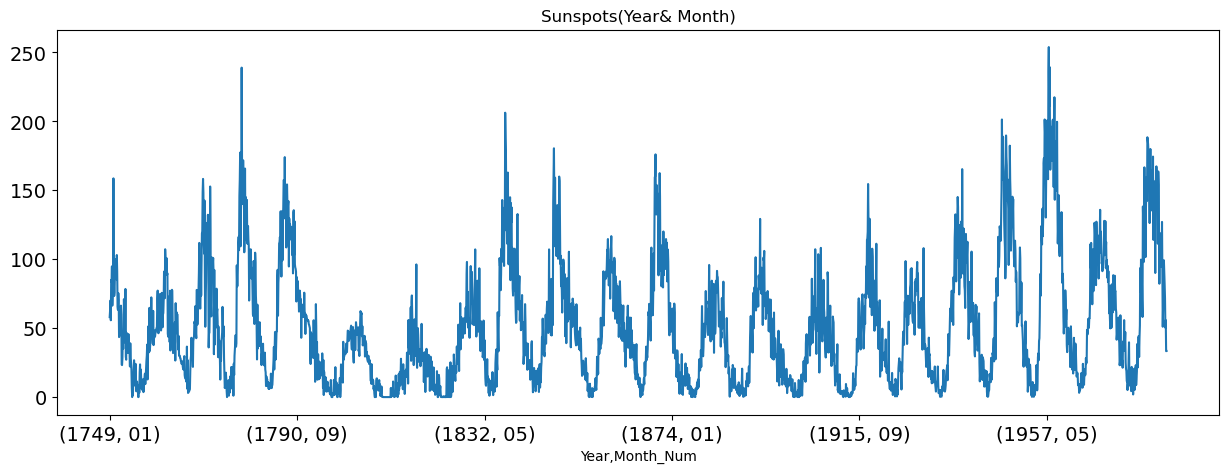

In [15]:
temp=train.groupby(['Year', 'Month_Num'])['Sunspots'].mean() 
temp.plot(figsize=(15,5), title= 'Sunspots(Year& Month)', fontsize=14)

In [16]:
train['Timestamp'] = pd.to_datetime(train.Month,format='%Y-%m') 
train.index = train.Timestamp 
# Converting to monthly mean 
monthly = train.resample('M').mean()
train

C:\Users\Corrado Mio\AppData\Local\Temp\ipykernel_3956\2103944462.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = train.resample('M').mean()


,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1749-01-01,1749-01,58.0,1749,01,1749-01-01
1749-02-01,1749-02,62.6,1749,02,1749-02-01
1749-03-01,1749-03,70.0,1749,03,1749-03-01
1749-04-01,1749-04,55.7,1749,04,1749-04-01
1749-05-01,1749-05,85.0,1749,05,1749-05-01
...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01
1983-09-01,1983-09,50.3,1983,09,1983-09-01
1983-10-01,1983-10,55.8,1983,10,1983-10-01


<AxesSubplot:title={'center':'Monthly'}, xlabel='Timestamp'>

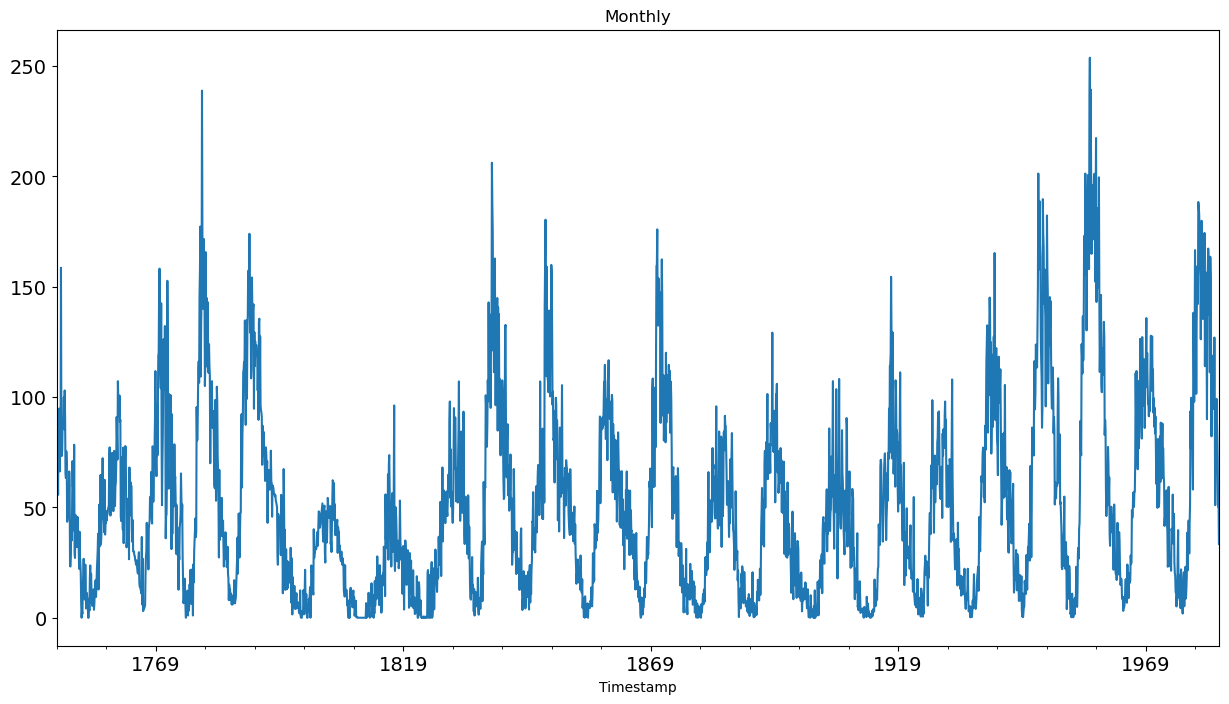

In [17]:
monthly['Sunspots'].plot(figsize=(15,8), title= 'Monthly', fontsize=14)

Define training and validation dates

In [18]:
Train=train.loc['1749-01-01':'1949-12-31'] 
valid=train.loc['1950-01-01':'1983-12-31']

In [19]:
Train

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1749-01-01,1749-01,58.0,1749,01,1749-01-01
1749-02-01,1749-02,62.6,1749,02,1749-02-01
1749-03-01,1749-03,70.0,1749,03,1749-03-01
1749-04-01,1749-04,55.7,1749,04,1749-04-01
1749-05-01,1749-05,85.0,1749,05,1749-05-01
...,...,...,...,...,...
1949-08-01,1949-08,123.8,1949,08,1949-08-01
1949-09-01,1949-09,145.3,1949,09,1949-09-01
1949-10-01,1949-10,131.6,1949,10,1949-10-01


In [20]:
valid

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1950-01-01,1950-01,101.6,1950,01,1950-01-01
1950-02-01,1950-02,94.8,1950,02,1950-02-01
1950-03-01,1950-03,109.7,1950,03,1950-03-01
1950-04-01,1950-04,113.4,1950,04,1950-04-01
1950-05-01,1950-05,106.2,1950,05,1950-05-01
...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01
1983-09-01,1983-09,50.3,1983,09,1983-09-01
1983-10-01,1983-10,55.8,1983,10,1983-10-01


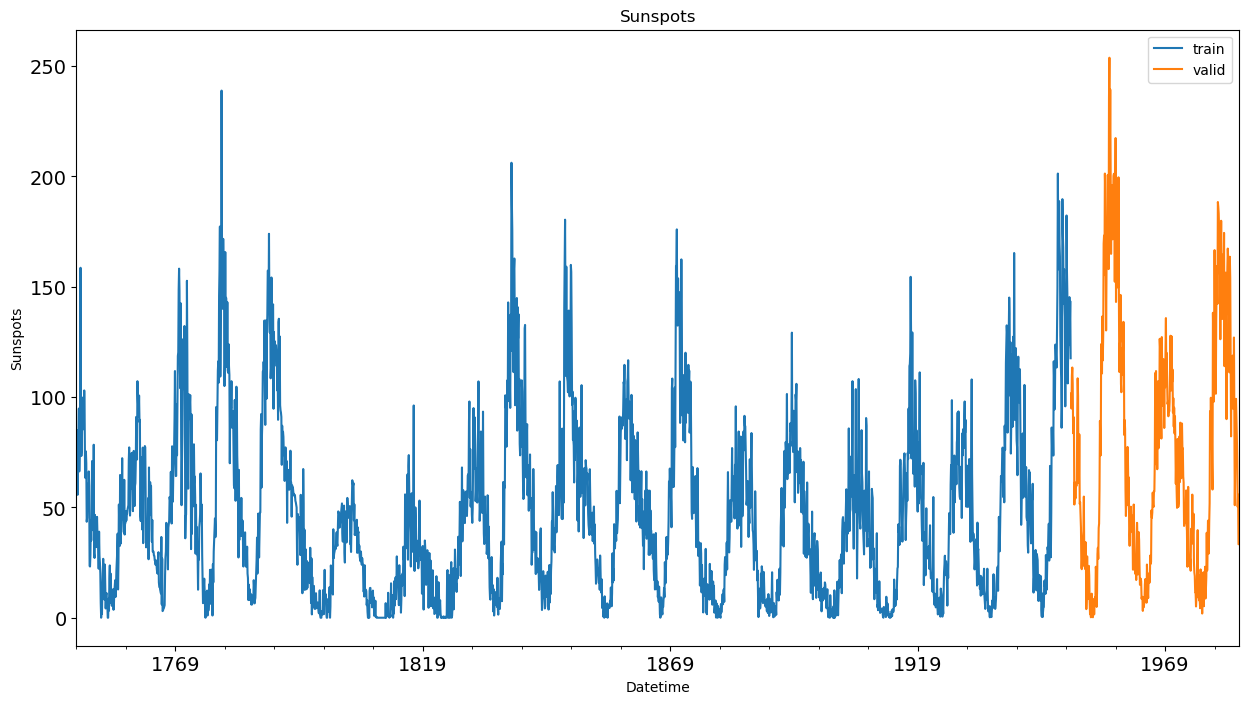

In [21]:
Train['Sunspots'].plot(figsize=(15,8), title= 'Sunspots', fontsize=14, label='train') 
valid['Sunspots'].plot(figsize=(15,8), title= 'Sunspots', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Sunspots") 
plt.legend(loc='best') 
plt.show()

Naive approach

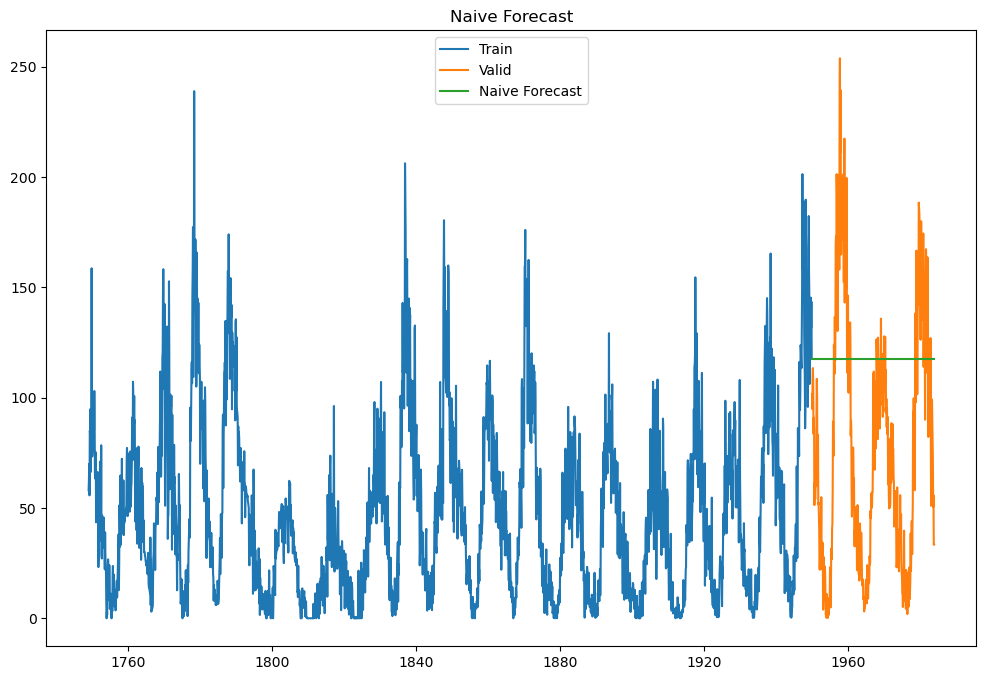

In [22]:
dd= np.asarray(Train['Sunspots']) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

Calculate errors

In [23]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat.naive)) 
print(rms)

69.61329230604078


In [24]:
y_hat

,Month,Sunspots,Year,Month_Num,Timestamp,naive
Timestamp,,,,,,
1950-01-01,1950-01,101.6,1950,01,1950-01-01,117.6
1950-02-01,1950-02,94.8,1950,02,1950-02-01,117.6
1950-03-01,1950-03,109.7,1950,03,1950-03-01,117.6
1950-04-01,1950-04,113.4,1950,04,1950-04-01,117.6
1950-05-01,1950-05,106.2,1950,05,1950-05-01,117.6
...,...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01,117.6
1983-09-01,1983-09,50.3,1983,09,1983-09-01,117.6
1983-10-01,1983-10,55.8,1983,10,1983-10-01,117.6


In [25]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat.naive.values})
df_val

,Actual,Predicted
0,101.6,117.6
1,94.8,117.6
2,109.7,117.6
3,113.4,117.6
4,106.2,117.6
...,...,...
403,71.8,117.6
404,50.3,117.6
405,55.8,117.6
406,33.3,117.6


Autoregression (AR)

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(Train.Sunspots, 1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

1950-01-01    111.158051
1950-02-01    105.305131
1950-03-01     99.987383
1950-04-01     95.155872
1950-05-01     90.766137
                 ...    
1983-08-01     47.147374
1983-09-01     47.147374
1983-10-01     47.147374
1983-11-01     47.147374
1983-12-01     47.147374
Freq: MS, Length: 408, dtype: float64


D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [32]:
y_hat = yhat.values
y_hat

array([111.15805058, 105.30513118,  99.9873829 ,  95.1558715 ,
        90.76613714,  86.7777852 ,  83.15411466,  79.86178027,
        76.87048577,  74.15270512,  71.68342911,  69.43993534,
        67.40157903,  65.54960312,  63.86696561,  62.33818277,
        60.94918665,  59.68719563,  58.54059679,  57.49883907,
        56.55233614,  55.69237824,  54.91105196,  54.20116752,
        53.5561925 ,  52.97019182,  52.43777305,  51.95403685,
        51.51453185,  51.11521369,  50.75240784,  50.42277572,
        50.12328405,  49.85117688,  49.60395027,  49.37932922,
        49.17524676,  48.9898249 ,  48.8213574 ,  48.66829399,
        48.52922618,  48.40287426,  48.28807553,  48.18377361,
        48.0890087 ,  48.00290878,  47.92468154,  47.85360713,
        47.78903153,  47.7303605 ,  47.67705415,  47.62862195,
        47.58461823,  47.54463806,  47.50831354,  47.47531041,
        47.44532498,  47.41808131,  47.39332871,  47.37083941,
        47.35040645,  47.33184181,  47.31497466,  47.29

In [33]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,111.158051
1,94.8,105.305131
2,109.7,99.987383
3,113.4,95.155872
4,106.2,90.766137
...,...,...
403,71.8,47.147374
404,50.3,47.147374
405,55.8,47.147374
406,33.3,47.147374


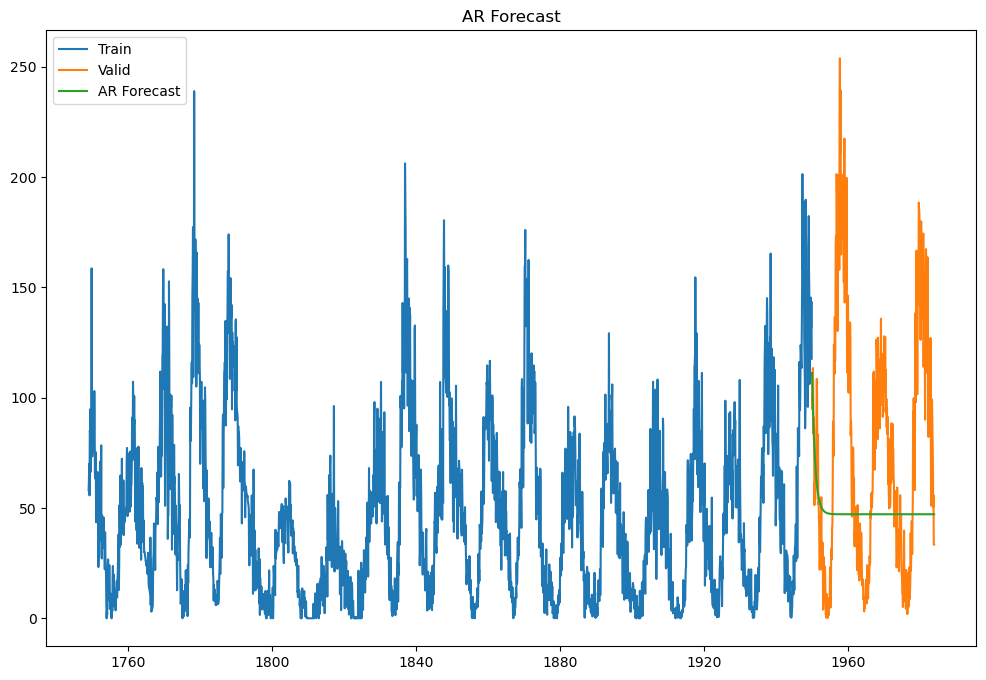

In [34]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='AR Forecast') 
plt.legend(loc='best') 
plt.title("AR Forecast") 
plt.show()

In [35]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

63.567261884582706


Moving Average (MA)

In [95]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model =ARIMA(Train.Sunspots, order=(0, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1950-01-01    127.817624
1950-02-01    127.817624
1950-03-01    127.817624
1950-04-01    127.817624
1950-05-01    127.817624
                 ...    
1983-08-01    127.817624
1983-09-01    127.817624
1983-10-01    127.817624
1983-11-01    127.817624
1983-12-01    127.817624
Freq: MS, Name: predicted_mean, Length: 408, dtype: float64


In [ ]:
y_hat = yhat.values
y_hat

array([64.28125553, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91873152,
       46.91873152, 46.91873152, 46.91873152, 46.91873152, 46.91

In [ ]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,64.281256
1,94.8,46.918732
2,109.7,46.918732
3,113.4,46.918732
4,106.2,46.918732
...,...,...
403,71.8,46.918732
404,50.3,46.918732
405,55.8,46.918732
406,33.3,46.918732


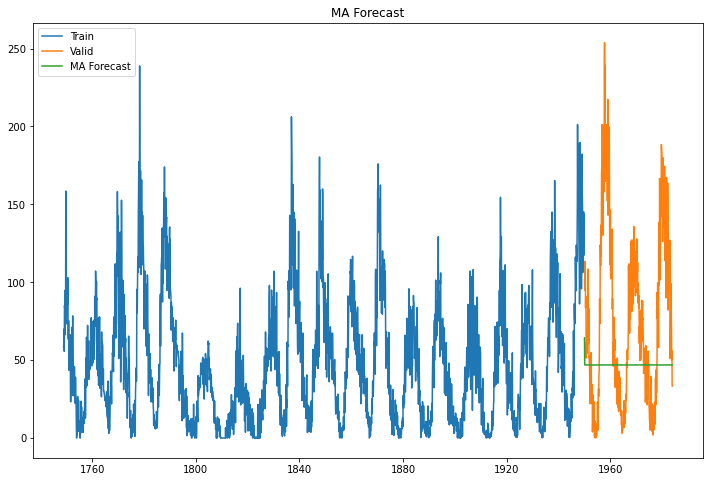

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='MA Forecast') 
plt.legend(loc='best') 
plt.title("MA Forecast") 
plt.show()

In [ ]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

64.06346135279794


Autoregressive Moving Average (ARMA)

In [41]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(Train.Sunspots, order=(2, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1950-01-01    125.325452
1950-02-01    127.726868
1950-03-01    128.056074
1950-04-01    128.065702
1950-05-01    128.059134
                 ...    
1983-08-01    128.057219
1983-09-01    128.057219
1983-10-01    128.057219
1983-11-01    128.057219
1983-12-01    128.057219
Freq: MS, Name: predicted_mean, Length: 408, dtype: float64


In [42]:
y_hat = yhat.values
y_hat

array([125.32545246, 127.72686835, 128.0560745 , 128.0657017 ,
       128.05913359, 128.05741969, 128.05721263, 128.05721195,
       128.05721728, 128.05721848, 128.05721861, 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.0572186 ,
       128.0572186 , 128.0572186 , 128.0572186 , 128.05

In [43]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,125.325452
1,94.8,127.726868
2,109.7,128.056074
3,113.4,128.065702
4,106.2,128.059134
...,...,...
403,71.8,128.057219
404,50.3,128.057219
405,55.8,128.057219
406,33.3,128.057219


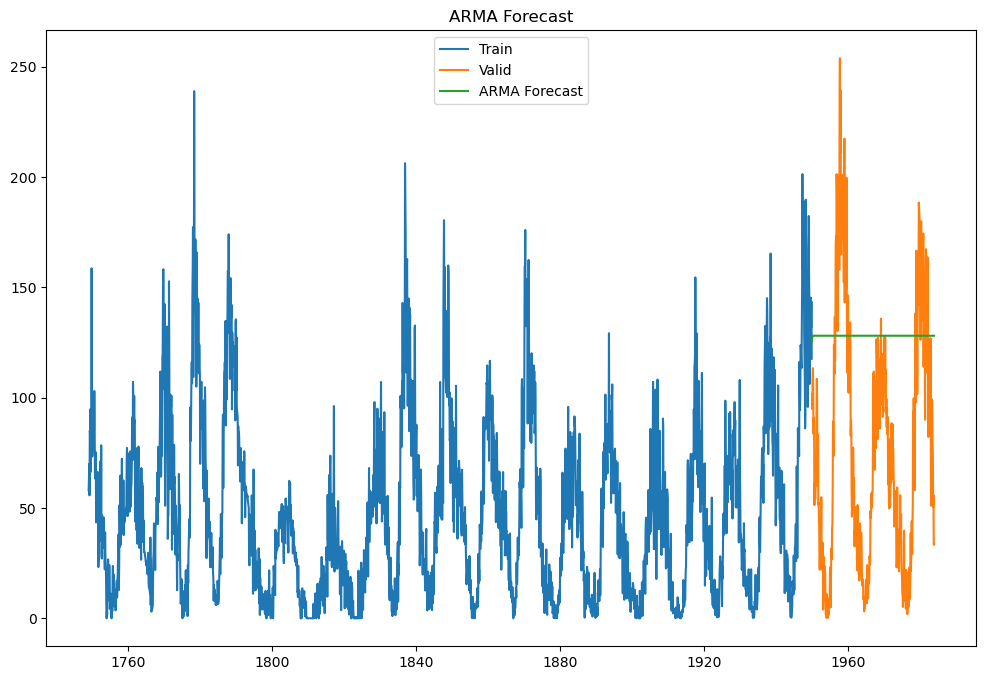

In [44]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='ARMA Forecast') 
plt.legend(loc='best') 
plt.title("ARMA Forecast") 
plt.show()

In [45]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

76.17930266836902


Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model =SARIMAX(Train.Sunspots, order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1], dynamic=False)

print(yhat)

D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1950-01-01    124.947468
1950-02-01    128.113298
1950-03-01    127.702623
1950-04-01    128.644563
1950-05-01    127.917319
                 ...    
1983-08-01    153.162294
1983-09-01    152.415399
1983-10-01    153.284755
1983-11-01    152.537859
1983-12-01    153.407215
Freq: MS, Name: predicted_mean, Length: 408, dtype: float64


In [50]:
y_hat = yhat.values
y_hat

array([124.94746787, 128.11329802, 127.70262254, 128.64456318,
       127.91731934, 128.79133029, 128.04548041, 128.91507882,
       128.16824012, 129.03760938, 128.29071679, 129.1600735 ,
       128.41317799, 129.28253401, 128.53563835, 129.40499433,
       128.65809866, 129.52745464, 128.78055897, 129.64991495,
       128.90301928, 129.77237526, 129.02547959, 129.89483557,
       129.14793989, 130.01729588, 129.2704002 , 130.13975619,
       129.39286051, 130.2622165 , 129.51532082, 130.3846768 ,
       129.63778113, 130.50713711, 129.76024144, 130.62959742,
       129.88270175, 130.75205773, 130.00516206, 130.87451804,
       130.12762237, 130.99697835, 130.25008267, 131.11943866,
       130.37254298, 131.24189897, 130.49500329, 131.36435928,
       130.6174636 , 131.48681959, 130.73992391, 131.60927989,
       130.86238422, 131.7317402 , 130.98484453, 131.85420051,
       131.10730484, 131.97666082, 131.22976515, 132.09912113,
       131.35222546, 132.22158144, 131.47468576, 132.34

In [51]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,124.947468
1,94.8,128.113298
2,109.7,127.702623
3,113.4,128.644563
4,106.2,127.917319
...,...,...
403,71.8,153.162294
404,50.3,152.415399
405,55.8,153.284755
406,33.3,152.537859


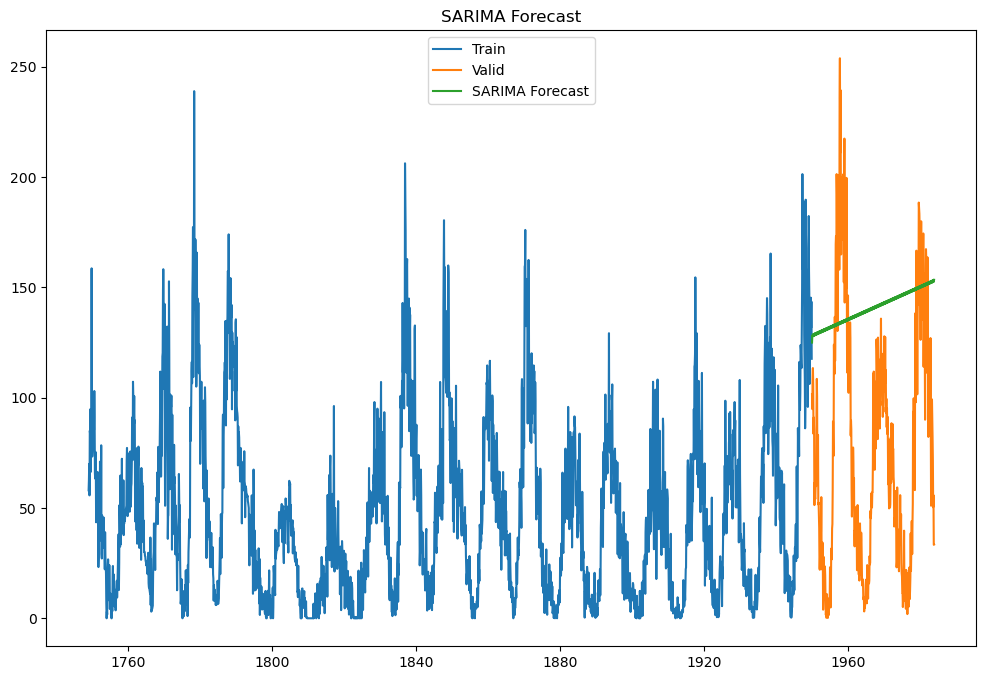

In [52]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='SARIMA Forecast') 
plt.legend(loc='best') 
plt.title("SARIMA Forecast") 
plt.show()

In [53]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

84.95267920943236


Simple Exponential Smoothing (SES)

In [54]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model =SimpleExpSmoothing(Train.Sunspots)
model_fit = model.fit(smoothing_level=0.6,optimized=False)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])

print(yhat)

1950-01-01    126.390287
1950-02-01    126.390287
1950-03-01    126.390287
1950-04-01    126.390287
1950-05-01    126.390287
                 ...    
1983-08-01    126.390287
1983-09-01    126.390287
1983-10-01    126.390287
1983-11-01    126.390287
1983-12-01    126.390287
Freq: MS, Length: 408, dtype: float64


D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
y_hat = yhat.values
y_hat

array([126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39028745,
       126.39028745, 126.39028745, 126.39028745, 126.39

In [56]:
df_val=pd.DataFrame({'Actual': valid['Sunspots'].values, 'Predicted': y_hat})
df_val

,Actual,Predicted
0,101.6,126.390287
1,94.8,126.390287
2,109.7,126.390287
3,113.4,126.390287
4,106.2,126.390287
...,...,...
403,71.8,126.390287
404,50.3,126.390287
405,55.8,126.390287
406,33.3,126.390287


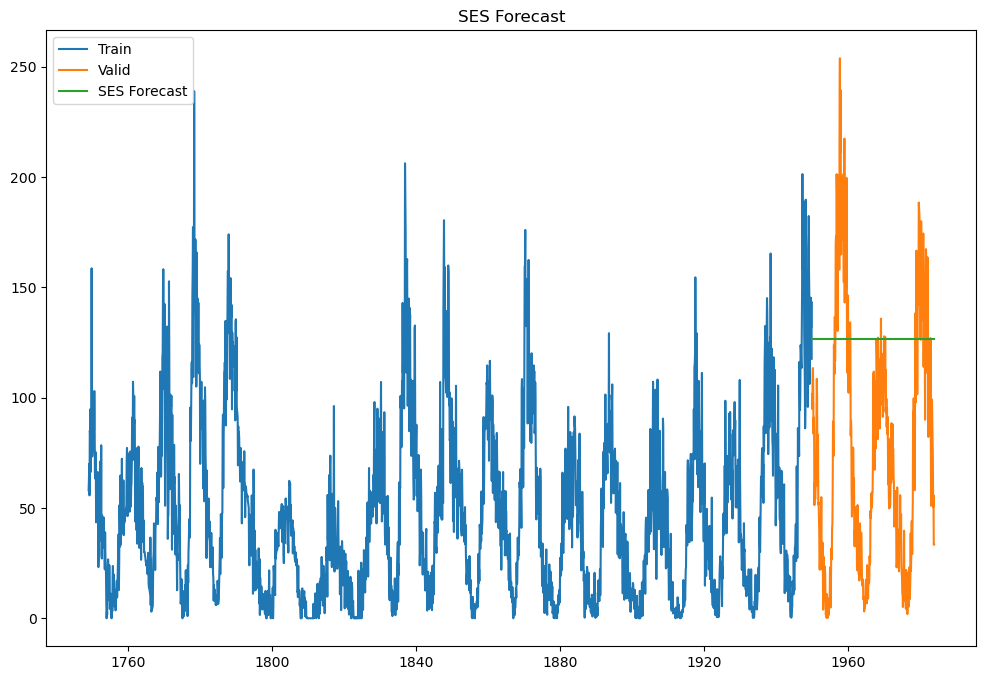

In [57]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='SES Forecast') 
plt.legend(loc='best') 
plt.title("SES Forecast") 
plt.show()

In [58]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

75.07573399723866


Holt Winter’s Exponential Smoothing (HWES)

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(Train.Sunspots)
model_fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
# make prediction
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])

print(yhat)

1950-01-01    130.430102
1950-02-01    130.430102
1950-03-01    130.430102
1950-04-01    130.430102
1950-05-01    130.430102
                 ...    
1983-08-01    130.430102
1983-09-01    130.430102
1983-10-01    130.430102
1983-11-01    130.430102
1983-12-01    130.430102
Freq: MS, Length: 408, dtype: float64


D:\Python\Anaconda3-2022.05\envs\tfcpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Corrado Mio\AppData\Local\Temp\ipykernel_3956\3525329829.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.1)


In [60]:
y_hat = yhat.values
y_hat

array([130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43010179,
       130.43010179, 130.43010179, 130.43010179, 130.43

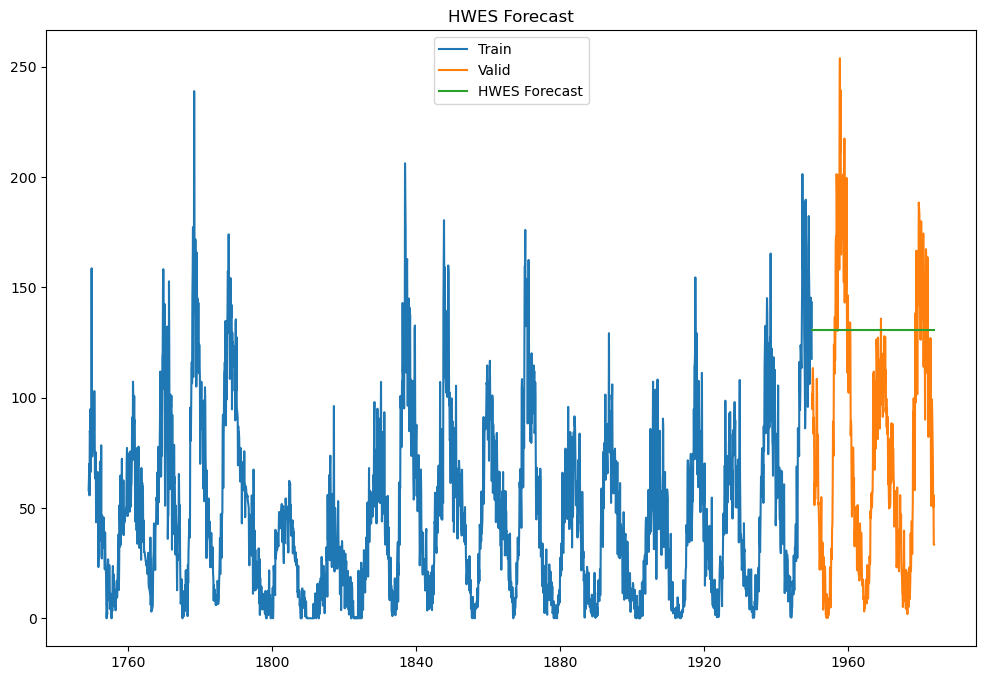

In [61]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Sunspots'], label='Train') 
plt.plot(valid.index,valid['Sunspots'], label='Valid') 
plt.plot(yhat, label='HWES Forecast') 
plt.legend(loc='best') 
plt.title("HWES Forecast") 
plt.show()

In [62]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sunspots'], y_hat)) 
print(rms)

77.79091367156943


FB Prophet

In [63]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(train, label='Sunspots')

features_and_target = pd.concat([X, y], axis=1)

C:\Users\Corrado Mio\AppData\Local\Temp\ipykernel_3956\2327214627.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [65]:
# See our features and target
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Sunspots
Timestamp,,,,,,,,,
1749-01-01,0,2,1,1,1749,1,1,1,58.0
1749-02-01,0,5,1,2,1749,32,1,5,62.6
1749-03-01,0,5,1,3,1749,60,1,9,70.0
1749-04-01,0,1,2,4,1749,91,1,14,55.7
1749-05-01,0,3,2,5,1749,121,1,18,85.0
...,...,...,...,...,...,...,...,...,...
1983-08-01,0,0,3,8,1983,213,1,31,71.8
1983-09-01,0,3,3,9,1983,244,1,35,50.3
1983-10-01,0,5,4,10,1983,274,1,39,55.8


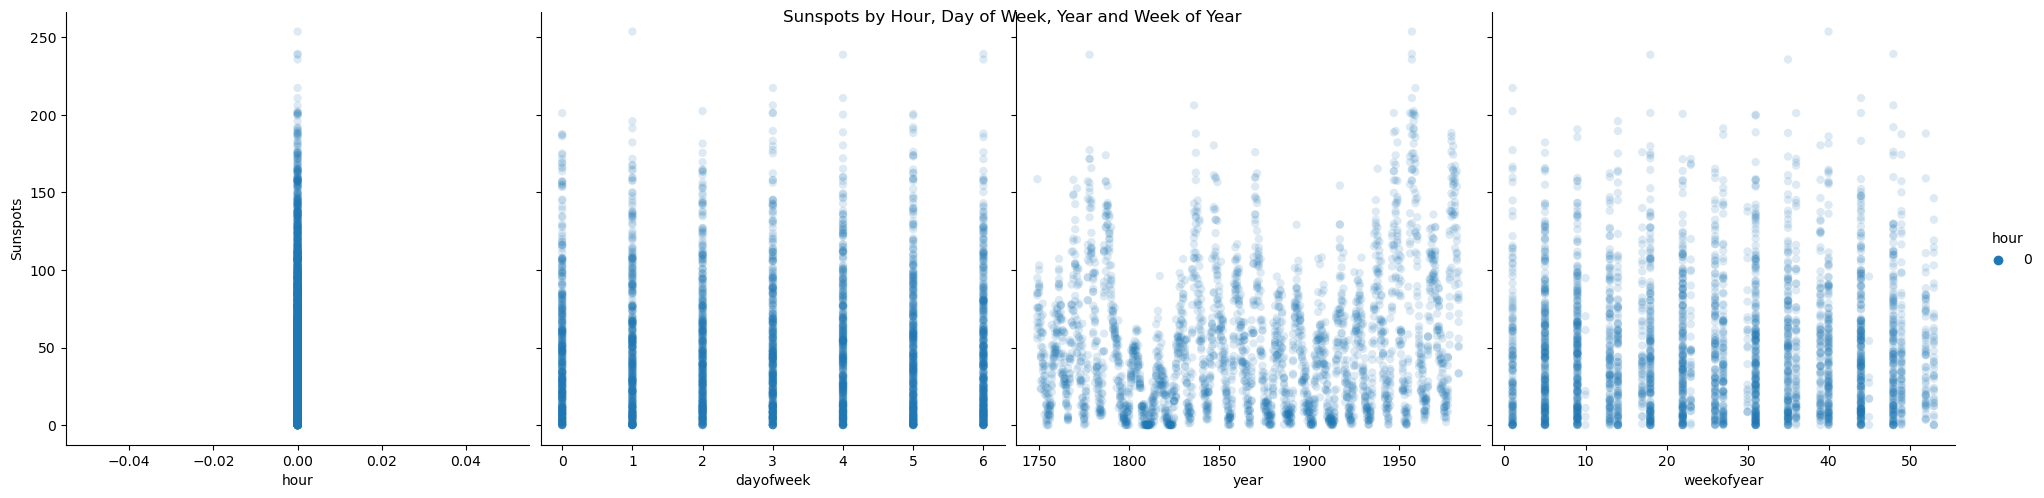

In [66]:
import seaborn as sns

sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Sunspots',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Sunspots by Hour, Day of Week, Year and Week of Year')
plt.show()

In [67]:
split_date = '12-31-1950'
s_train = train.loc[train.index <= split_date].copy()
s_val = train.loc[train.index > split_date].copy()

In [68]:
s_val

,Month,Sunspots,Year,Month_Num,Timestamp
Timestamp,,,,,
1951-01-01,1951-01,59.9,1951,01,1951-01-01
1951-02-01,1951-02,59.9,1951,02,1951-02-01
1951-03-01,1951-03,59.9,1951,03,1951-03-01
1951-04-01,1951-04,92.9,1951,04,1951-04-01
1951-05-01,1951-05,108.5,1951,05,1951-05-01
...,...,...,...,...,...
1983-08-01,1983-08,71.8,1983,08,1983-08-01
1983-09-01,1983-09,50.3,1983,09,1983-09-01
1983-10-01,1983-10,55.8,1983,10,1983-10-01


In [69]:
s_val.drop(['Month', 'Year', 'Month_Num', 'Timestamp'], axis=1, inplace=True)
s_train.drop(['Month', 'Year', 'Month_Num', 'Timestamp'],axis=1, inplace=True)

In [70]:
s_val

,Sunspots
Timestamp,
1951-01-01,59.9
1951-02-01,59.9
1951-03-01,59.9
1951-04-01,92.9
1951-05-01,108.5
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


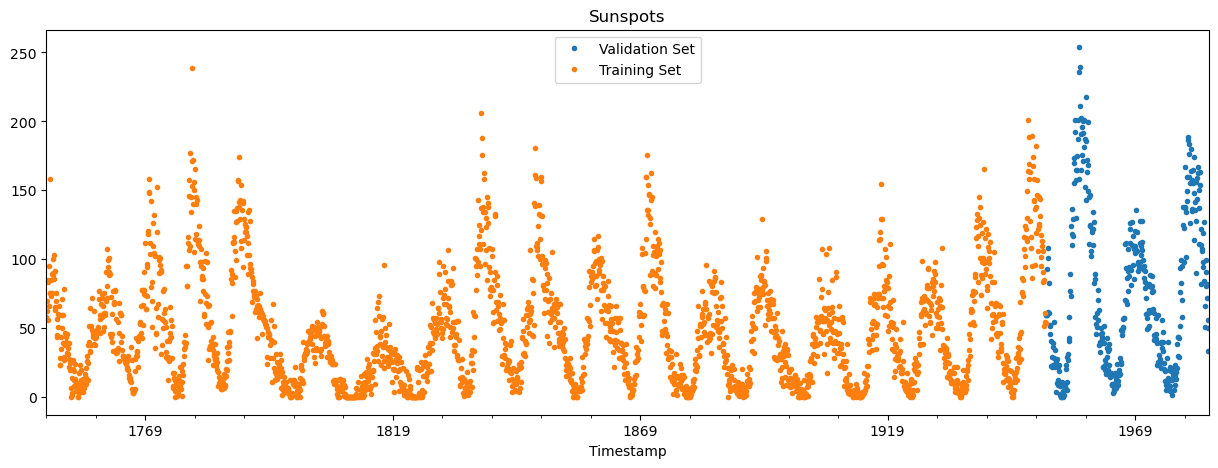

In [71]:
# Plot train and val so you can see where we have split
s_val \
    .rename(columns={'Sunspots': 'Validation Set'}) \
    .join(s_train.rename(columns={'Sunspots': 'Training Set'}),
          how='outer') \
    .plot(figsize=(15,5), title='Sunspots', style='.')
plt.show()

In [72]:
# Format data for prophet model using ds and y
s_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'Sunspots':'y'})

,Timestamp,y
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0
...,...,...
2419,1950-08-01,85.2
2420,1950-09-01,51.3
2421,1950-10-01,61.4
2422,1950-11-01,54.8


In [73]:
s_train['Datetime'] = s_train.index
s_val['Datetime'] = s_val.index

In [75]:
# Setup and train model and fit
from prophet import Prophet

model = Prophet()
model.fit(s_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'Sunspots':'y'}))

Importing plotly failed. Interactive plots will not work.
18:50:07 - cmdstanpy - INFO - Chain [1] start processing
18:50:07 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
# Predict on validation set with model
s_val_fcst = model.predict(df=s_val.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))
s_val_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1951-01-01,72.958092,23.419231,120.658121,72.958092,72.958092,-3.170832,-3.170832,-3.170832,-3.170832,-3.170832,-3.170832,0.0,0.0,0.0,69.787260
1,1951-02-01,73.035927,30.628442,123.029123,73.035927,73.035927,2.272199,2.272199,2.272199,2.272199,2.272199,2.272199,0.0,0.0,0.0,75.308127
2,1951-03-01,73.106230,25.102648,120.057993,73.106230,73.106230,0.943846,0.943846,0.943846,0.943846,0.943846,0.943846,0.0,0.0,0.0,74.050077
3,1951-04-01,73.184066,23.582756,118.040967,73.184066,73.184066,-0.884103,-0.884103,-0.884103,-0.884103,-0.884103,-0.884103,0.0,0.0,0.0,72.299963
4,1951-05-01,73.259391,24.434835,123.457374,73.259391,73.259391,-1.877311,-1.877311,-1.877311,-1.877311,-1.877311,-1.877311,0.0,0.0,0.0,71.382080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1983-08-01,102.836865,59.720679,155.724196,91.351697,113.658287,2.447083,2.447083,2.447083,2.447083,2.447083,2.447083,0.0,0.0,0.0,105.283948
392,1983-09-01,102.914700,57.978699,154.353280,91.403341,113.787821,-0.053221,-0.053221,-0.053221,-0.053221,-0.053221,-0.053221,0.0,0.0,0.0,102.861480
393,1983-10-01,102.990025,53.931072,156.925159,91.447546,113.914843,1.836429,1.836429,1.836429,1.836429,1.836429,1.836429,0.0,0.0,0.0,104.826454
394,1983-11-01,103.067860,51.873357,149.179346,91.434953,114.044377,-2.612522,-2.612522,-2.612522,-2.612522,-2.612522,-2.612522,0.0,0.0,0.0,100.455338


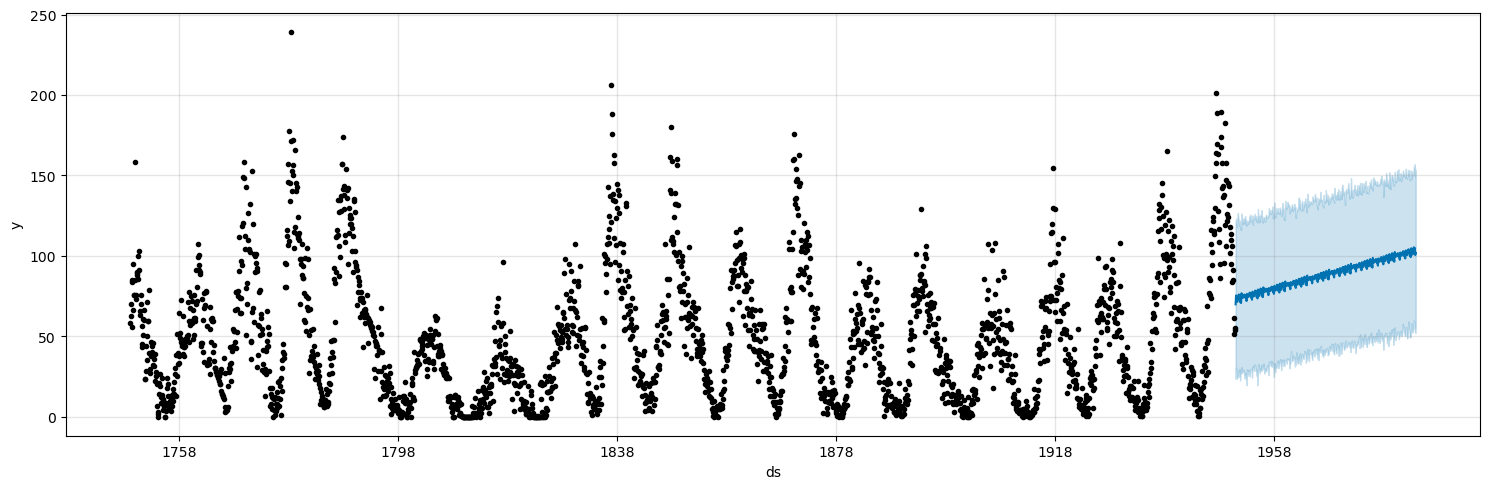

In [77]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(s_val_fcst,
                 ax=ax)
plt.show()

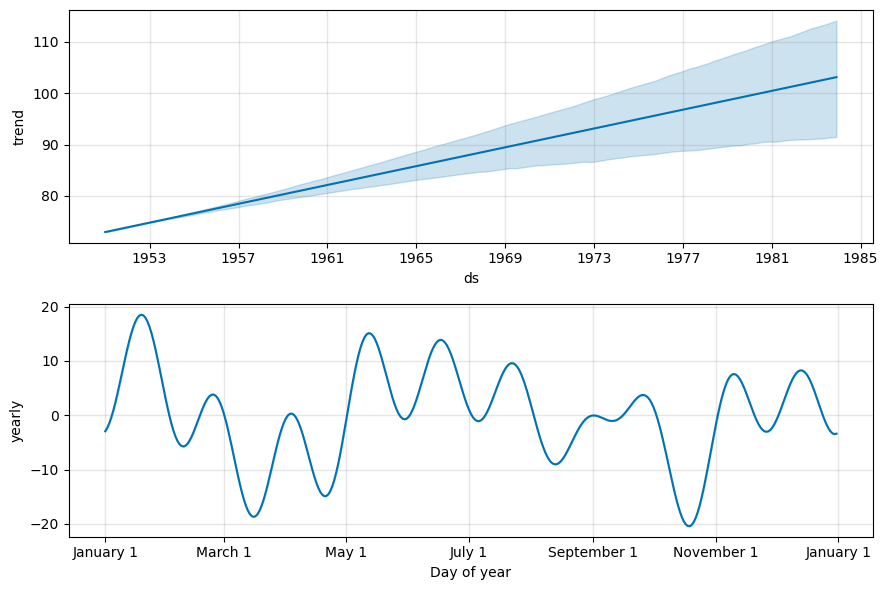

In [78]:
# Plot the components of the model
fig = model.plot_components(s_val_fcst)

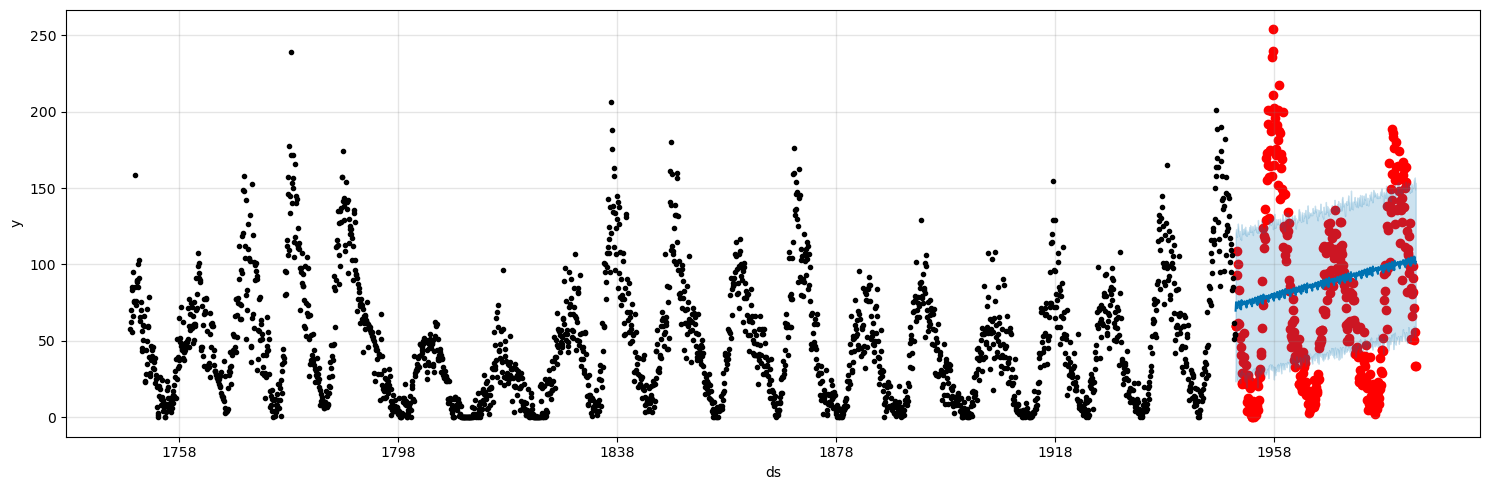

In [79]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(s_val.index, s_val['Sunspots'], color='r')
fig = model.plot(s_val_fcst, ax=ax)

In [80]:
mean_squared_error(y_true=s_val['Sunspots'],
                   y_pred=s_val_fcst['yhat'])

3389.759748875452

In [81]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=s_val['Sunspots'],
                   y_pred=s_val_fcst['yhat'])

49.495811239321554

In [82]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=s_val['Sunspots'],
                   y_pred=s_val_fcst['yhat'])

493.4304761797879

In [83]:
y_true = s_val.Sunspots.values
y_true

array([5.990e+01, 5.990e+01, 5.990e+01, 9.290e+01, 1.085e+02, 1.006e+02,
       6.150e+01, 6.100e+01, 8.310e+01, 5.160e+01, 5.240e+01, 4.580e+01,
       4.070e+01, 2.270e+01, 2.200e+01, 2.910e+01, 2.340e+01, 3.640e+01,
       3.930e+01, 5.490e+01, 2.820e+01, 2.380e+01, 2.210e+01, 3.430e+01,
       2.650e+01, 3.900e+00, 1.000e+01, 2.780e+01, 1.250e+01, 2.180e+01,
       8.600e+00, 2.350e+01, 1.930e+01, 8.200e+00, 1.600e+00, 2.500e+00,
       2.000e-01, 5.000e-01, 1.090e+01, 1.800e+00, 8.000e-01, 2.000e-01,
       4.800e+00, 8.400e+00, 1.500e+00, 7.000e+00, 9.200e+00, 7.600e+00,
       2.310e+01, 2.080e+01, 4.900e+00, 1.130e+01, 2.890e+01, 3.170e+01,
       2.670e+01, 4.070e+01, 4.270e+01, 5.850e+01, 8.920e+01, 7.690e+01,
       7.360e+01, 1.240e+02, 1.184e+02, 1.107e+02, 1.366e+02, 1.166e+02,
       1.291e+02, 1.696e+02, 1.732e+02, 1.553e+02, 2.013e+02, 1.921e+02,
       1.650e+02, 1.302e+02, 1.574e+02, 1.752e+02, 1.646e+02, 2.007e+02,
       1.872e+02, 1.580e+02, 2.358e+02, 2.538e+02, 

In [84]:
y_hat = s_val_fcst.yhat.astype(int)
y_hat

0       69
1       75
2       74
3       72
4       71
      ... 
391    105
392    102
393    104
394    100
395    101
Name: yhat, Length: 396, dtype: int32

In [85]:
dfval=pd.DataFrame({'Actual': y_true, 'Predicted': y_hat})
dfval.reset_index(drop=True, inplace=True)
dfval

,Actual,Predicted
0,59.9,69
1,59.9,75
2,59.9,74
3,92.9,72
4,108.5,71
...,...,...
391,71.8,105
392,50.3,102
393,55.8,104
394,33.3,100


Random Forest

In [86]:
X = train.index.factorize()[0].reshape(-1,1) 
y = train['Sunspots'].values

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=0)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2397, 1), (2397,), (423, 1), (423,))

In [88]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9843857711375945


In [89]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.902322230906963


In [90]:
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

14.323531481295886


In [91]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
0,38.1,51.4364
1,42.7,40.3826
2,13.2,5.9623
3,71.8,49.4726
4,71.6,64.4772
...,...,...
418,80.6,78.6259
419,73.6,90.9563
420,30.1,37.3575
421,57.0,52.3499


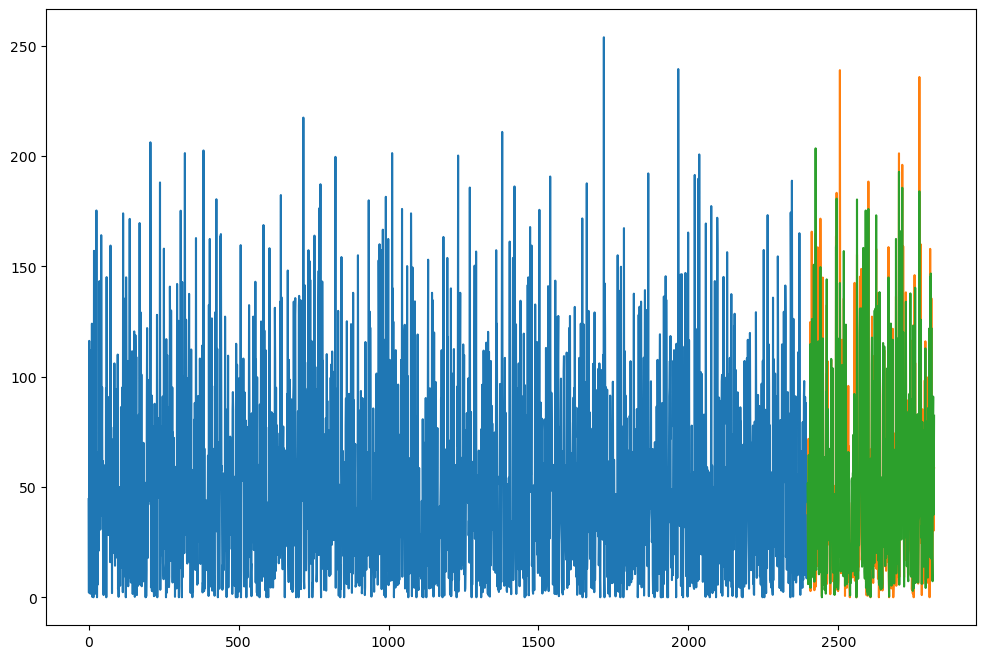

In [92]:
# plot predictions and expected results
from matplotlib import pyplot

plt.figure(figsize=(12,8)) 
pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()